# Matlab으로 데이터 시각화하기

**데이터를 보기좋게 표현해봅시다.**

#### 1. Matplotlib 시작하기
   
#### 2. 자주 사용되는 Plotting의 Options
- 크기 : `figsize`
- 제목 : `title`
- 라벨 : `_label`
- 눈금 : `_tics`
- 범례 : `legend`
  
#### 3. Matplotlib Case Study
- 꺾은선 그래프 (Plot)
- 산점도 (Scatter Plot)
- 박스그림 (Box Plot)
- 막대그래프 (Bar Chart)
- 원형그래프 (Pie Chart)
  
#### 4. The 멋진 그래프, seaborn Case Study
- 커널밀도그림 (Kernel Density Plot)
- 카운트그림 (Count Plot)
- 캣그림 (Cat Plot)
- 스트립그림 (Strip Plot)
- 히트맵 (Heatmap)
  

## I. Matplotlib 시작하기

- 파이썬의 데이터 시각화 라이브러리

*라이브러리 : 다른 개발자들이 만들어놓은 코드의 모음*
> cf) 라이브러리 vs 프레임워크
> - 라이브러리 : 원하는 대로 조합하여 사용
> - 프레임워크 : 이미 짜여진 틀에 내용을 채움

- `%matplotlib inline`을 통해서 활성화
  - notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## II. Matplotlib Case Study

- `plt.plot()` : 꺾은선 그래프를 그려주는 함수
- `plt.show()` : plt를 확인하는 명령

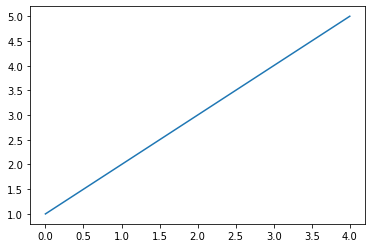

In [2]:
plt.plot([1,2,3,4,5])  # 실제 plotting을 하는 함수 # y = x + 1
plt.show() # plt를 확인하는 명령

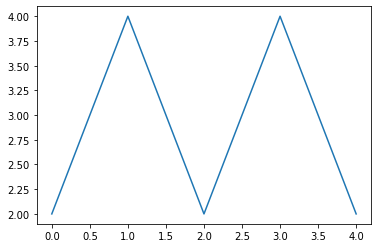

In [3]:
plt.plot([2,4,2,4,2])
plt.show()

👉x를 따로 지정해주지 않았기때문에 자동적으로 인덱스를 x로 한다.

### Figsize 옵션
Figure(도면)의 크기 조절
- tuple 형태로 선언
- 1 pixel (72 해상도) 단위

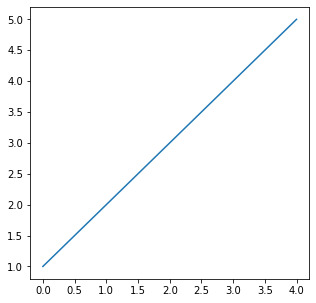

In [4]:
plt.figure(figsize=(5, 5))  # plotting을 할 도면을 선언

plt.plot([1,2,3,4,5])
plt.show()

### 2차함수 그래프 with plot()

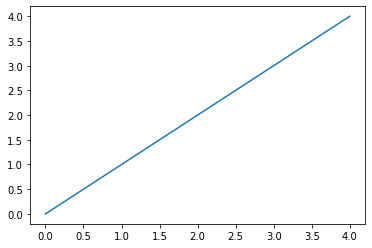

In [5]:
# 리스트 이용해서 1차함수 y=x를 그려보면:

plt.plot([0,1,2,3,4])
plt.show()

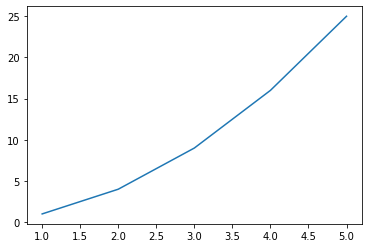

In [6]:
# numpy.array를 이용해서 함수 그래프 그리기
# y = x ^ 2

x = np.array([1,2,3,4,5])  # 정의역
y = np.array([1,4,9,16,25])  # f(x)

plt.plot(x, y)
plt.show()

😒그래프가 매끄럽지 못하다.

🔥`np.arange()` 함수를 이용하여 매끄럽게 그려보자!
- `np.arrange(a, b, c)` (python의 range() 함수와 다르게 c에 실수 가능!)

`plt.xlabel()`, `plt.ylabel()`을 이용하여 x축과 y축에 설명을 추가할 수 있다.

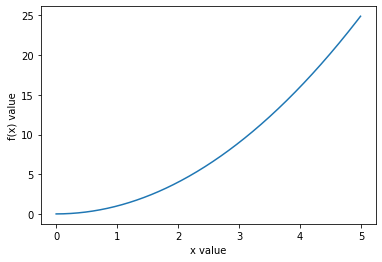

In [8]:
# np.arange(a, b, c) c: 0.01
x = np.arange(0, 5, 0.01)

plt.xlabel("x value")     #
plt.ylabel("f(x) value")  #

plt.plot(x, x**2)
plt.show()

`plt.axis()`을 이용하여 x와 y의 범위를 지정해줄 수 있다. [x_min, x_max, y_min, y_max]

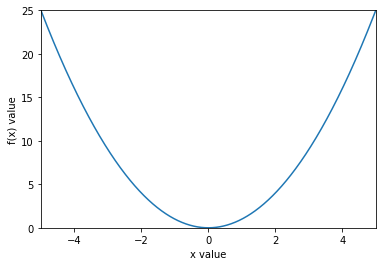

In [10]:
# x, y축의 범위를 설정하기

x = np.arange(-10, 10, 0.01)

plt.xlabel("x value")
plt.ylabel("f(x) value")

plt.axis([-5, 5, 0, 25]) #

plt.plot(x, x**2)
plt.show()

`plt.xticks()`, `plt.yticks()`를 이용하여 눈금을 설정할 수 있다.

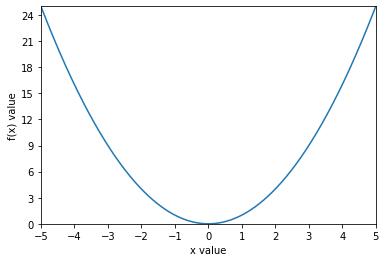

In [12]:
# x, y축의 눈금 설정하기

x = np.arange(-10, 10, 0.01)

plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.axis([-5, 5, 0, 25])

plt.xticks([i for i in range(-5, 6, 1)])  # x축의 눈금 설정, -5, -4, -3, ....
plt.yticks([i for i in range(0,27, 3)])  # y축의 눈금 설정

plt.plot(x, x**2)
plt.show()

`plt.title()`을 이용하여 그래프의 타이틀을 추가할 수 있다.

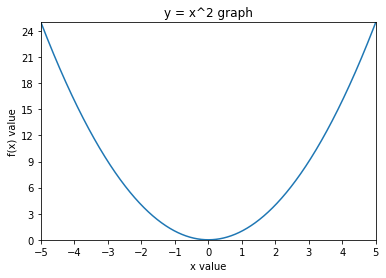

In [14]:
# 그래프에 title 달기

x = np.arange(-10, 10, 0.01)

plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.axis([-5, 5, 0, 25])

plt.xticks([i for i in range(-5, 6, 1)])
plt.yticks([i for i in range(0,27, 3)])

plt.title("y = x^2 graph")  #

plt.plot(x, x**2)
plt.show()

`plt.plot()` 에 `label` 옵션으로 각 선의 이름을 지정해줄 수 있다.

`plt.legend()` 는 **선을 그린 이후**에 적어주어야 한다!

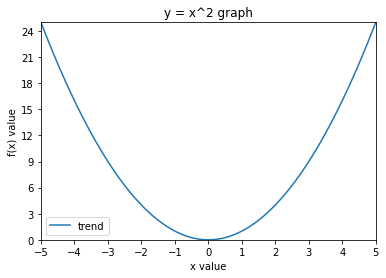

In [16]:
# 그래프에 title 달기

x = np.arange(-10, 10, 0.01)

plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.axis([-5, 5, 0, 25])

plt.xticks([i for i in range(-5, 6, 1)])
plt.yticks([i for i in range(0,27, 3)])

plt.title("y = x^2 graph") 

plt.plot(x, x**2, label="trend")  #
plt.legend()  #

plt.show()

## III. Matplotlib Case Study - 여러 plot들

### 꺾은선 그래프(Plot)
- `.plot()`

In [38]:
x = np.arange(20)  # 0~19
y = np.random.randint(0, 20, 20)  # 난수를 20번 생성

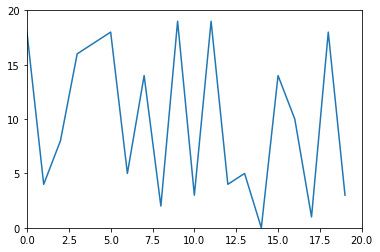

In [39]:
# Extra : y축을 20까지 보이게 하고싶다면? , y축을 "5단위로 보이게하고 싶다면?"
# .axis(), yticks()
plt.axis([0, 20, 0, 20])
plt.yticks([i for i in range(0, 21, 5)])

plt.plot(x, y)
plt.show()

### 산점도 (Scatter Plot)
- `.scatter()`
- 점으로만 표현

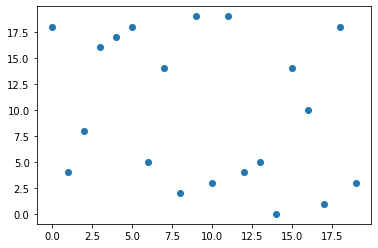

In [40]:
plt.scatter(x, y)
plt.show()

👉plot vs scatter plot
- 꺾은선 그래프(plot)는 시계열 데이터에서 많이 사용
- 산점도(scatter plot)는 x와 y가 완전히 별개인 변수일 경우 사용 (두 변수 사이의 상관관계 파악 용이)

### 박스 그림 (Box Plot)
- `.boxplot()`

- 수치형 데이터에 대한 정보 (Q1, Q2, Q3, min, max)
- 맨위, 맨아래는 각각 최대/최소값
- 가운데 박스에서
    1. 박스의 밑 부분 : Q1 - 25%
    2. 박스의 중앙 부분 : Q2 - 50% (median; 중앙값)
    3. 박스의 윗 부분 : Q3 - 75%

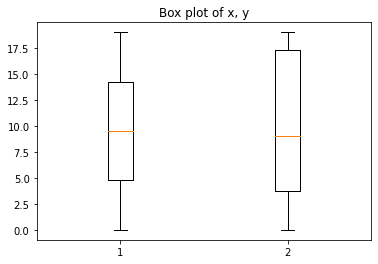

In [42]:
plt.boxplot((x, y))

# Extra : Plot의 title을 "Box plot of x, y"
plt.title("Box plot of x, y")

plt.show()

### 막대 그래프 (Bar Plot)
- `.bar()`
- `.hist()`
  - bins 옵션으로 범주 지정 가능

- 범주형 데이터의 "값"과 그 값의 "크기"를 직사각형으로 나타낸 그림

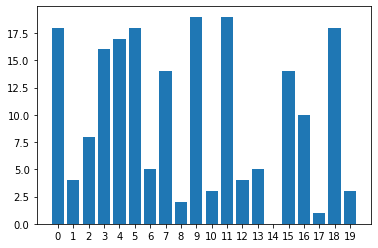

In [50]:
plt.bar(x, y)

# Extra : xticks를 올바르게 처리해봅시다.
plt.xticks(np.arange(0,20,1))

plt.show()

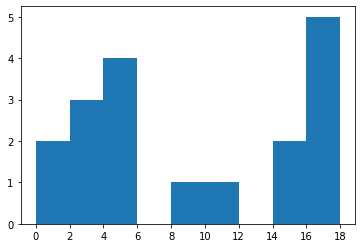

[18  4  8 16 17 18  5 14  2 19  3 19  4  5  0 14 10  1 18  3]


In [51]:
# cf) Histogram
# 도수분포를 직사각형의 막대 형태로 나타냈다.
# "계급"으로 나타낸 것이 특징 : 0, 1, 2가 아니라 0~2 까지의 "범주형" 데이터로 구성 후 그림을 그림

plt.hist(y, bins=np.arange(0, 20, 2))

# Extra : xticks를 올바르게 고쳐봅시다.
plt.xticks(np.arange(0,20,2))

plt.show()

### 원형 그래프 (Pie Chart)
- `.pie()`

- 데이터에서 전체에 대한 부분의 비율을 부채꼴로 나타낸 그래프
- 다른 그래프에 비해서 **비율**확인에 용이

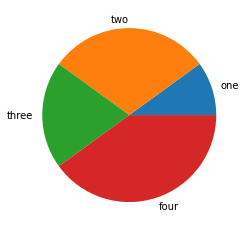

In [55]:
z = [100,300,200,400]

plt.pie(z, labels=['one', 'two', 'three', 'four'])
plt.show()

## IV. The 멋진 그래프, Seaborn Case Study

### Seaborn
Matplotlib를 기반으로 더 다양한 시각화 방법을 제공하는 라이브러리
- 커널밀도그림
- 카운트그림
- 캣그림
- 스트립그림
- 히트맵

### Seaborn Import 하기

In [59]:
import seaborn as sns

### 커널밀도그림 (Kernel Density Plot)
- `sns.kdeplot()`
  - shade 옵션으로 색칠 가능

- 히스토그램과 같은 연속적인 분포를 곡선화해서 그린 그림

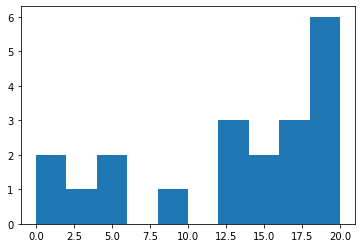

In [57]:
# in Histogram

x = np.arange(0, 22, 2)
y = np.random.randint(0, 20, 20)

plt.hist(y, bins=x)

plt.show()

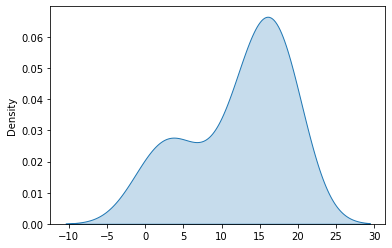

In [61]:
# kdeplot

sns.kdeplot(y, shade=True)

plt.show()

### 카운트그림 (Count Plot)
- `sns.countplot()`

- 범주형 column의 빈도수를 시각화 -> Groupby 후의 도수를 하는 것과 동일한 효과

In [62]:
vote_df = pd.DataFrame({"name":['Andy', 'Bob', 'Cat'], "vote":[True, True, False]})

vote_df

,name,vote
0,Andy,True
1,Bob,True
2,Cat,False


In [63]:
# in matplotlib

vote_count = vote_df.groupby(by='vote').count()

vote_count

,name
vote,
False,1
True,2


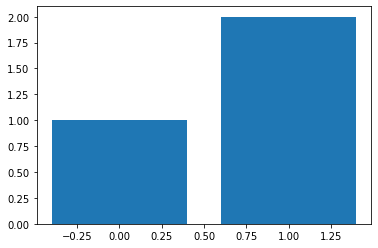

In [69]:
plt.bar(x=[False, True], height=vote_count['name'])

plt.show()

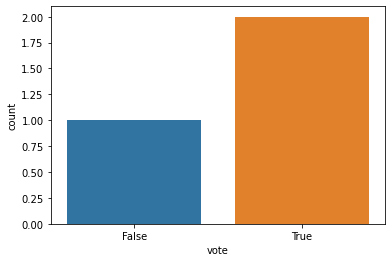

In [67]:
# sns의 countplot

sns.countplot(x=vote_df['vote'])

plt.show()

### 캣그림 (Cat Plot)
- `sns.catplot()`
  - hue 옵션으로 각 범주 내의 종류를 시각화할 수 있음
  - kind 옵션으로 그래프 형태를 변경할 수 있음 (default: strip)

- 숫자형 변수와 하나 이상의 범주형 변수의 관계를 보여주는 함수

In [72]:
covid = pd.read_csv('./country_wise_latest.csv')

covid.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


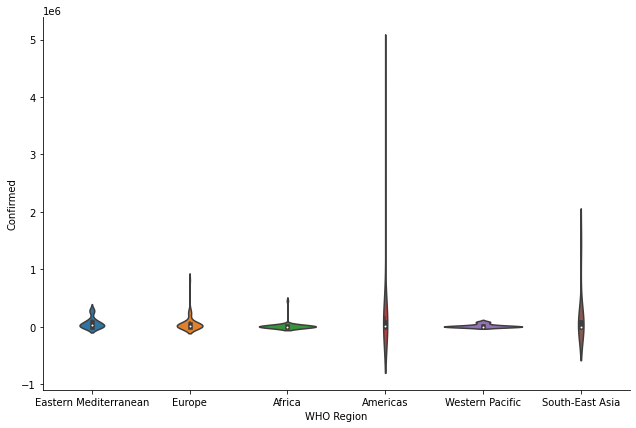

In [79]:
s = sns.catplot(x='WHO Region', y='Confirmed', data=covid) # kind='violin'
s.fig.set_size_inches(10, 6)

plt.show()

### 스트립그림(Strip Plot)
- `sns.stripplot()`

- scatter plot과 유사하게 데이터의 수치를 표현하는 그래프

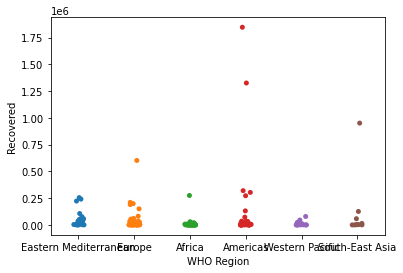

In [80]:
sns.stripplot(x='WHO Region', y='Recovered', data=covid)

plt.show()

c:\users\nyk70\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nyk70\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nyk70\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\nyk70\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

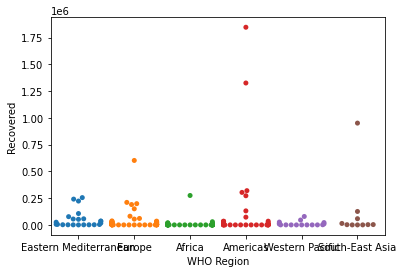

In [81]:
# cf) swarmplot
# 여기서 뜨는 에러는 중복된 점들의 값이 많다는 것에 대한 경고!

sns.swarmplot(x='WHO Region', y='Recovered', data=covid)

plt.show()

### 히트맵 (Heatmap)
- `sns.heatmap()`

- 데이터의 행렬을 색상으로 표현해주는 그래프
- **상관계수행렬**에 많이 사용

In [82]:
# 히트맵 예제

covid.corr()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Confirmed,1.000000,0.934698,0.906377,0.927018,0.909720,0.871683,0.859252,0.063550,-0.064815,0.025175,0.999127,0.954710,-0.010161
Deaths,0.934698,1.000000,0.832098,0.871586,0.806975,0.814161,0.765114,0.251565,-0.114529,0.169006,0.939082,0.855330,-0.034708
Recovered,0.906377,0.832098,1.000000,0.682103,0.818942,0.820338,0.919203,0.048438,0.026610,-0.027277,0.899312,0.910013,-0.013697
Active,0.927018,0.871586,0.682103,1.000000,0.851190,0.781123,0.673887,0.054380,-0.132618,0.058386,0.931459,0.847642,-0.003752
New cases,0.909720,0.806975,0.818942,0.851190,1.000000,0.935947,0.914765,0.020104,-0.078666,-0.011637,0.896084,0.959993,0.030791
New deaths,0.871683,0.814161,0.820338,0.781123,0.935947,1.000000,0.889234,0.060399,-0.062792,-0.020750,0.862118,0.894915,0.025293
New recovered,0.859252,0.765114,0.919203,0.673887,0.914765,0.889234,1.000000,0.017090,-0.024293,-0.023340,0.839692,0.954321,0.032662
Deaths / 100 Cases,0.063550,0.251565,0.048438,0.054380,0.020104,0.060399,0.017090,1.000000,-0.168920,0.334594,0.069894,0.015095,-0.134534
Recovered / 100 Cases,-0.064815,-0.114529,0.026610,-0.132618,-0.078666,-0.062792,-0.024293,-0.168920,1.000000,-0.295381,-0.064600,-0.063013,-0.394254
Deaths / 100 Recovered,0.025175,0.169006,-0.027277,0.058386,-0.011637,-0.020750,-0.023340,0.334594,-0.295381,1.000000,0.030460,-0.013763,-0.049083


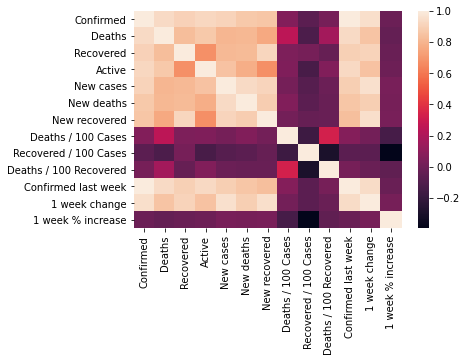

In [83]:
sns.heatmap(covid.corr())

plt.show()